In [78]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
amn_df = pd.read_csv('datasets/All_listings/sample_listings_amenities.csv').dropna()
amn_df.shape

(34209, 2)

In [32]:
amenities_col = amn_df['amenities']
amenities_col.head()

0    {TV,Internet,"Wireless Internet",Kitchen,"Elev...
1    {Internet,"Wireless Internet",Kitchen,"Buzzer/...
2    {TV,"Wireless Internet","Air conditioning","El...
3    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
4    {TV,Internet,Kitchen,"Elevator in building",He...
Name: amenities, dtype: object

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern = ur'(?!,|$)(.+?)(?=,|$)')
# first, get rid of all the '\"'s:
amenities_col = amenities_col.str[1:-1].replace('\"', '')
# Now actually transform the data:
X = vectorizer.fit_transform(amenities_col)
labels = vectorizer.get_feature_names()


In [34]:
X

<34209x123 sparse matrix of type '<type 'numpy.int64'>'
	with 559955 stored elements in Compressed Sparse Row format>

In [35]:
expanded_df = pd.DataFrame(X.todense(), columns = ['AMN_'+label for label in labels])
expanded_df.set_index(amn_df.id, inplace=True)
expanded_df.head()

,"AMN_ smooth pathway to front door""","AMN_""24-hour check-in""","AMN_""accessible-height bed""","AMN_""accessible-height toilet""","AMN_""air conditioning""","AMN_""air purifier""","AMN_""baby bath""","AMN_""baby monitor""","AMN_""babysitter recommendations""","AMN_""bathtub with shower chair""",...,AMN_other,AMN_oven,AMN_pool,AMN_refrigerator,AMN_shampoo,AMN_smartlock,AMN_stove,AMN_tv,AMN_washer,AMN_waterfront
id,,,,,,,,,,,,,,,,,,,,,
931833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
5359638,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
13327397,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
726391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14463911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
expanded_df.to_csv('datasets/All_listings/sample_listings_amenities_expanded.csv', encoding='utf-8')

In [53]:
sums=X.sum(axis=0)

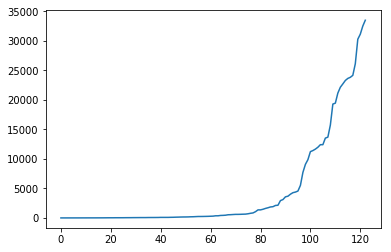

In [89]:
sums_df=pd.DataFrame(sums)
p = sums_df.T.sort_values(0).reset_index().iloc[:,1].plot()

In [62]:
X.shape[0]

34209